In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("Datasets/Concrete_Data.csv")

In [22]:
df.shape

(1030, 9)

In [23]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


 Based on the observation above Concrete Compressive strength is our dependent feature...

In [24]:
# Since the column name sare complecated change the names...
df.columns = ["cement","slag","ash","water","superplastic","coarseagg","fineagg","age","strength"]

In [25]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


 fishing for NA values

In [26]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>1]
print("count of NAN value features = ",features_with_na)

count of NAN value features =  []


There are no NAN or missing values in the dataset 

## Univariate analysis

In [27]:
# to show the info of each feature in the df...

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
superplastic,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
coarseagg,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
fineagg,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [30]:
# let's see weather there are any continuous variable features....

### Descrete Features

In [31]:

descrete_feature = [feature for feature in df.columns if len(df[feature].unique())<25]
descrete_feature # factors considering descrete features is completely subjective i chose 25 you can chose 15..
print("count of descrete features = ",len(descrete_feature))

count of descrete features =  1


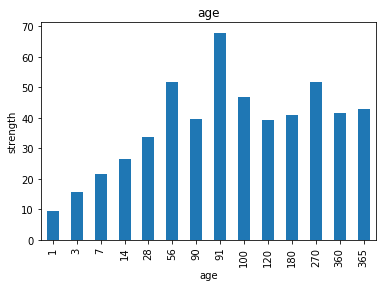

In [32]:
for feature in descrete_feature:
    data = df.copy()
    data.groupby(feature)["strength"].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("strength")
    plt.show()

From the above observation we can tell that when age is increasing the strength is also increasing but after 90 the strength is decreasing.
The Age feature data is normally distributed and slightly skewed towards left.

### continuous features

In [33]:
continuous_features = [feature for feature in df.columns if feature not in descrete_feature]
continuous_features

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'strength']

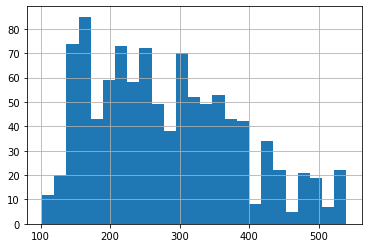

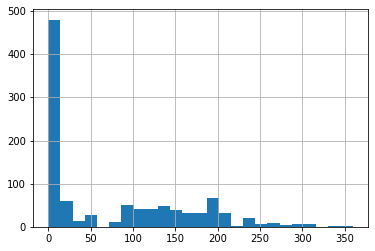

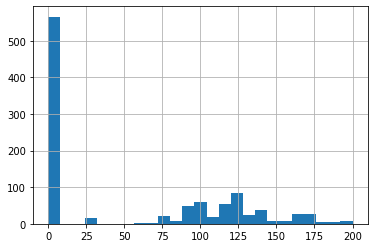

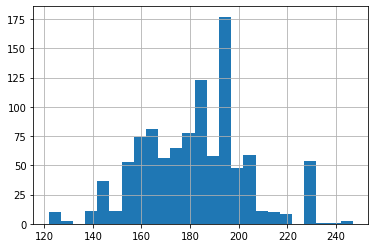

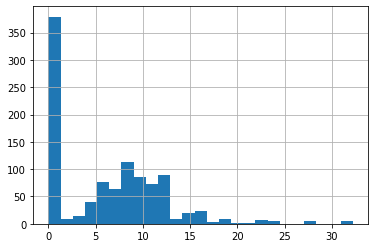

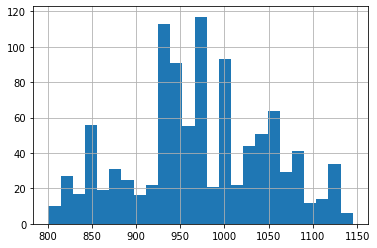

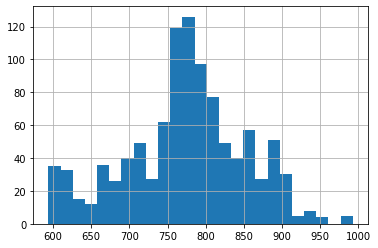

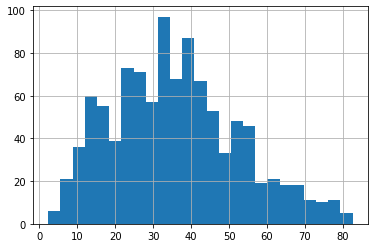

In [34]:
for feature in continuous_features:
    data = df.copy()
    data[feature].hist(bins = 25)
    plt.show()

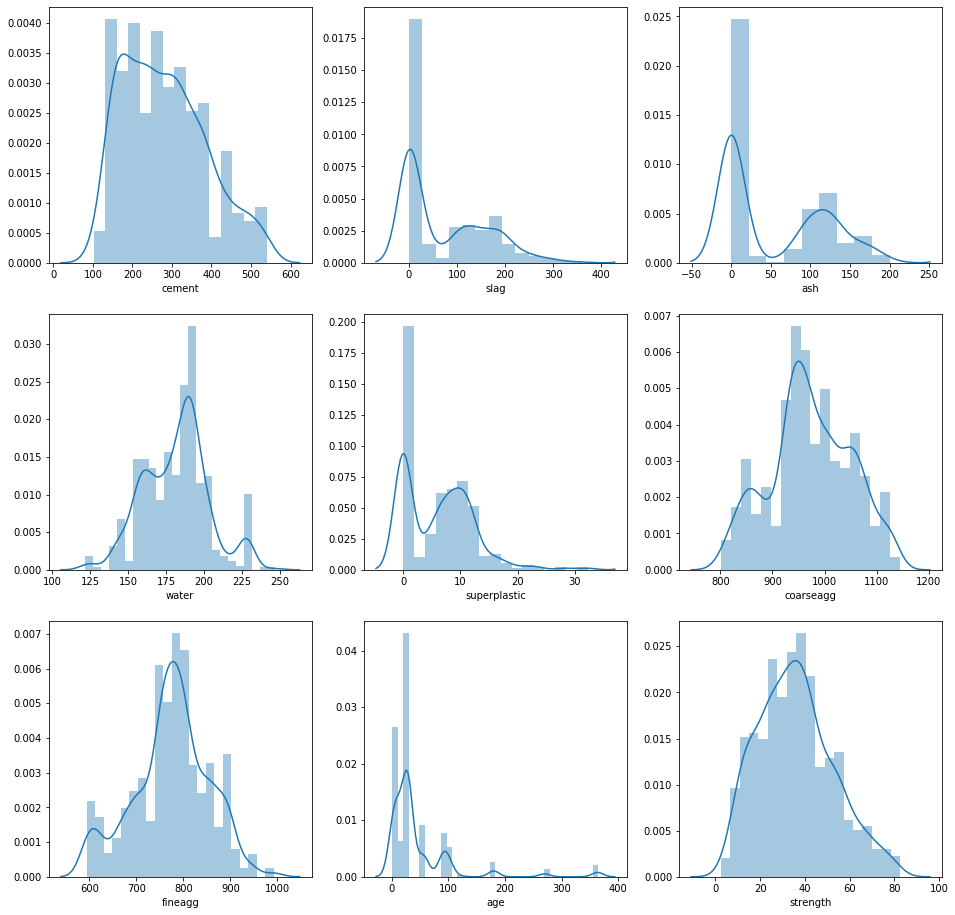

In [35]:
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])

From above observation except cement and coarseagg all are skewed.../n

slag has three gausssians and rightly skewed.

ash has two gaussians and rightly skewed.

water has three guassians and slighly left skewed.

superplastic has two gaussians and rightly skewed.

coarseagg has three guassians and almost normal.

fineagg has almost two guassians and looks like normal.

age has multiple guassians and rightly skewed.

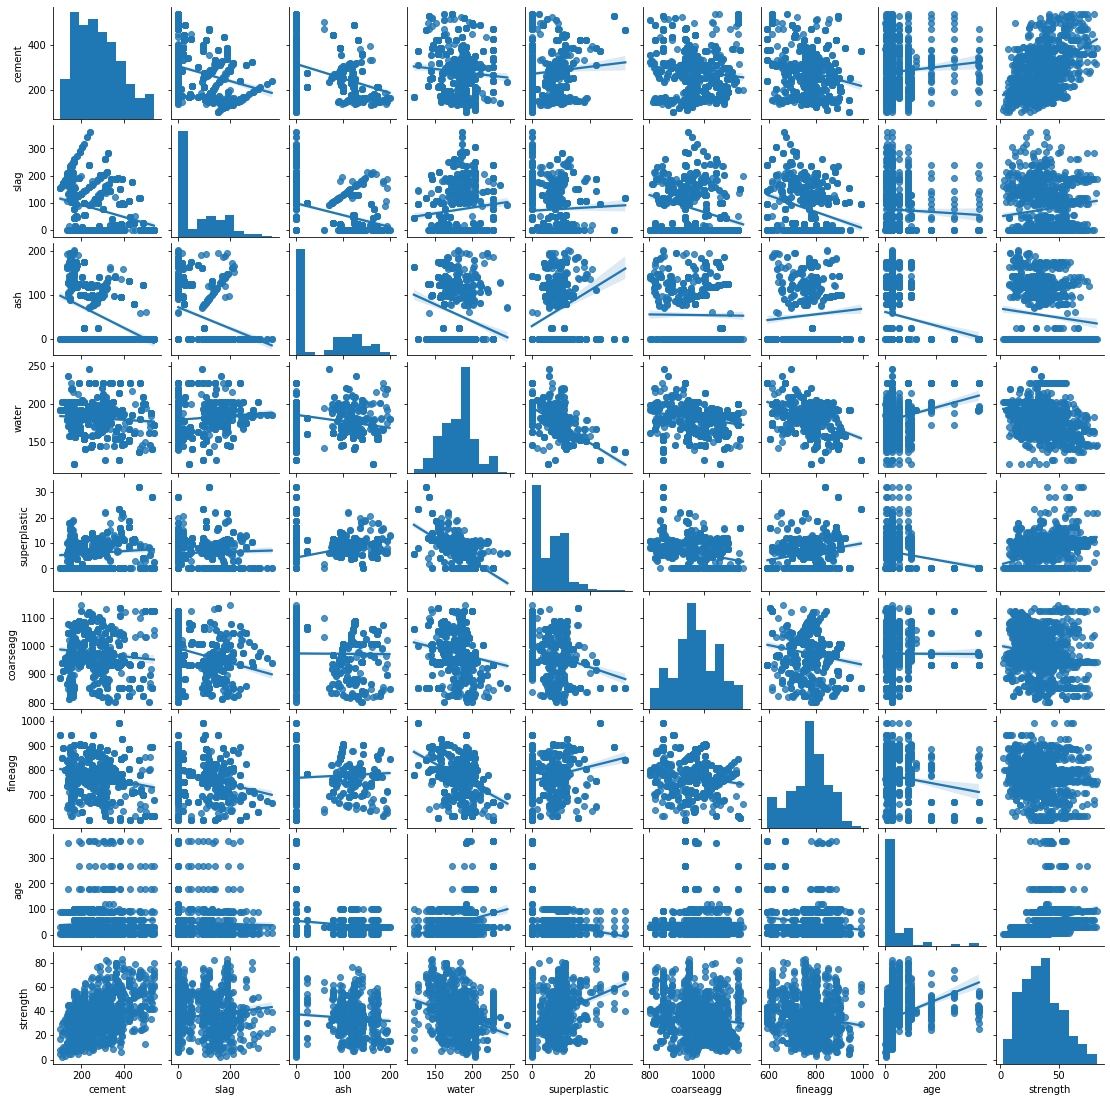

In [36]:
p = sns.pairplot(df,kind = "reg")
p.fig.set_size_inches(15,15)

#### Distribution analysis based on diagonals

This is giving us the same information as we got from the "Distplot"

#### Relation between one independent feature with the other

1. Cement: Cement has no linear relation with any of the other independent features... 

2. Slug: Slug is also not maintaining any significant linear relation with any of other independent features

3. Ash: Ash has almost no linear relation with other attributes but it has negative linear relation with Slug and Cement.

4. Water: This attribute have negative linear relation with super plastic and fineagg but doesnot have any significant linear relation with others.

5. Superplastic: It has negative linear relation with only water and does not have any significant relation with other attributes.

6. Coarseagg: This attribute also got no significant relationship with any other attribute.

7. Fineagg: It has negative linear relation with water but does not have any significant relation with any other attribute.

The chances of these attributes to be correlated is less so we need to consider all attributes in our model.

#### Relationship between Independent features and strength
Observations from pairplot: 
1. Cement: when cement increases strength increases.

2. Slug: strength has no relation with slug so slug is not a good predictor

3. ash: strength has no linear relation with ash so ash is not a good predictor.

4. water: strength decreasing when water increasing there is a negative linear relation  but relationship is week

5. super plasticizer: strength increasing when superplatic increasing could be a good predictor

6. coarseagg: no  linear relation

7. fineagg: no linear relation

8. age: strength increasing when age increasing but it is not a consistent value...

Based on the observations above we can say that none of the attributes are good predictors of the strength in linear model...

### We will check the results in correlation matrix.

In [37]:
cor = df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
superplastic,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
coarseagg,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
fineagg,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


If we consider  no correlation to be -0.5 to 0.5 then there will is no or less correlation between all columns...

But when we consider -0.3 to 0.3 as no correlation then there are some columns that are relatively correlated.

In [38]:
outlier_cols = [feature for feature in df,columns if ((df[feature] - df[feature].mean()) /df[feature].std()).abs()>3][feature].count())

SyntaxError: invalid syntax (<ipython-input-38-c662b4c4afe1>, line 1)

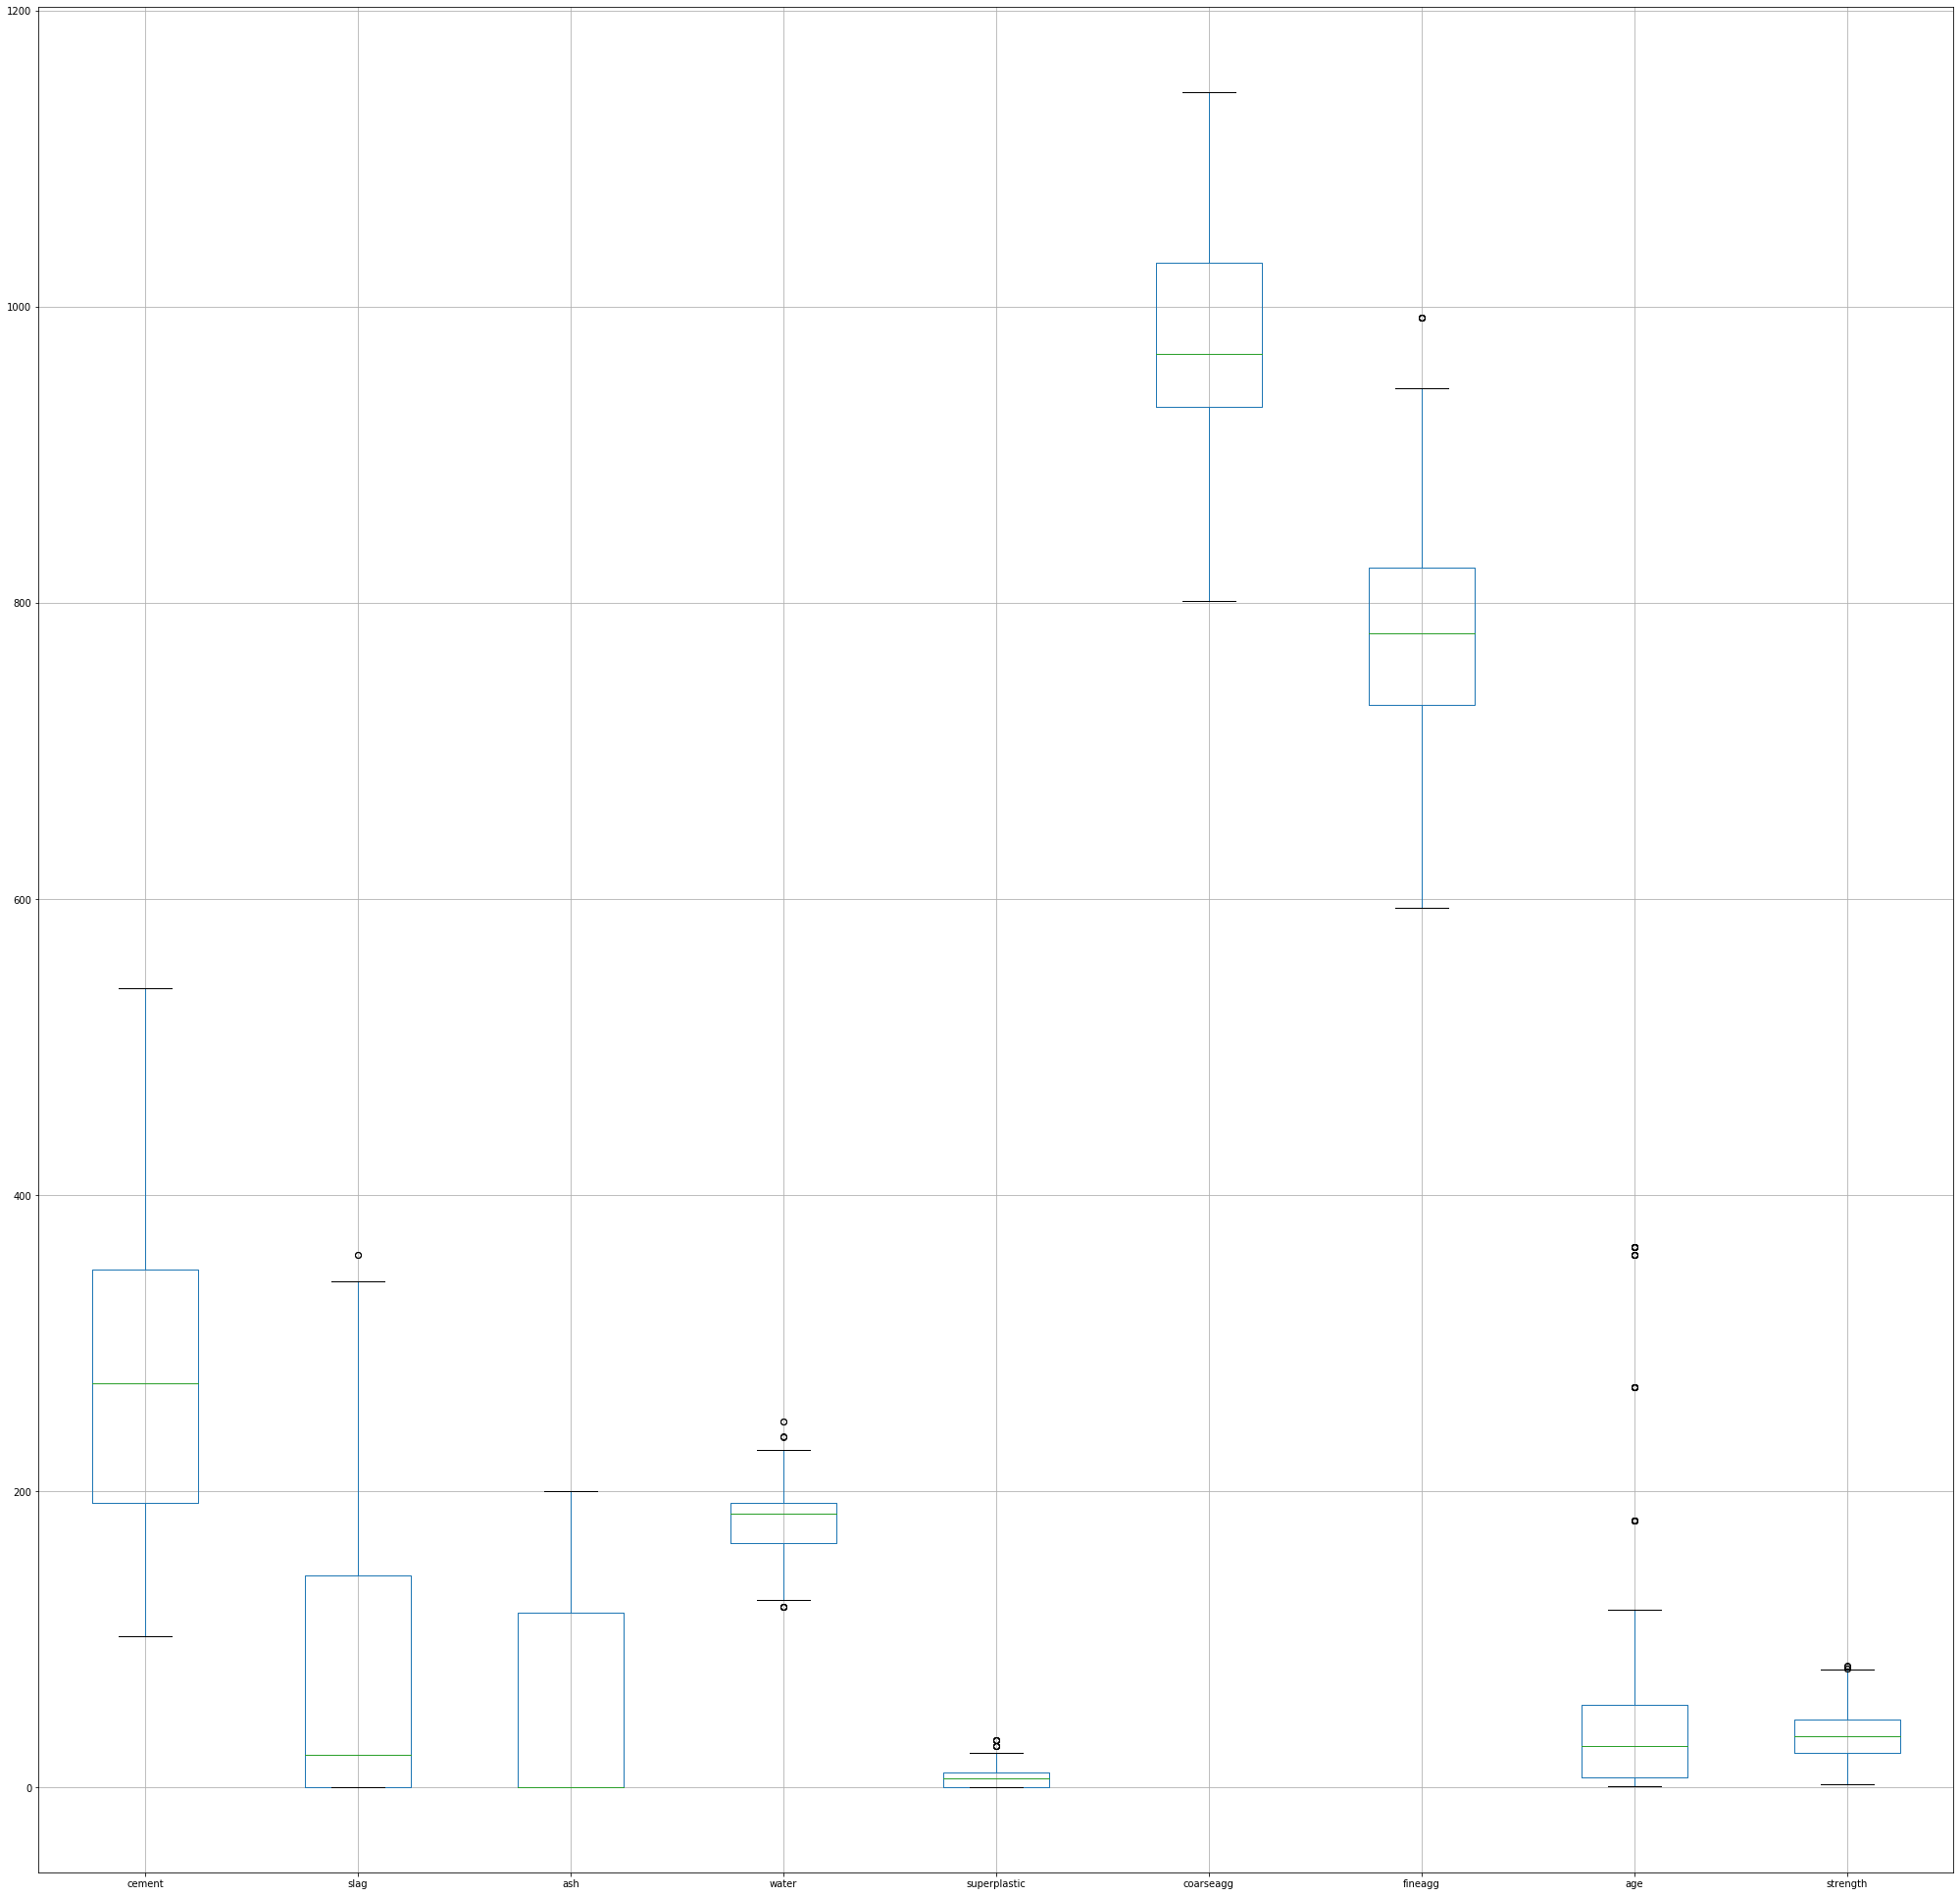

In [42]:
df1 = df.copy()
df.boxplot(figsize = (35,35))

In [40]:
concrete_df1 = df.copy()
print('Number of outliers in age: ',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'].count())

Number of outliers in age:  33


In [41]:
print('Number of outliers in cement: ',concrete_df1[((concrete_df1.cement - concrete_df1.cement.mean()) / concrete_df1.cement.std()).abs() >3]['cement'].count())

print('Number of outliers in slag: ',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'].count())

print('Number of outliers in ash: ',concrete_df1[((concrete_df1.ash - concrete_df1.ash.mean()) / concrete_df1.ash.std()).abs() >3]['ash'].count())

print('Number of outliers in water: ',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'].count())

print('Number of outliers in superplastic: ',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'].count())

print('Number of outliers in coarseagg: ',concrete_df1[((concrete_df1.coarseagg - concrete_df1.coarseagg.mean()) / concrete_df1.coarseagg.std()).abs() >3]['coarseagg'].count())

print('Number of outliers in fineagg: ',concrete_df1[((concrete_df1.fineagg - concrete_df1.fineagg.mean()) / concrete_df1.fineagg.std()).abs() >3]['fineagg'].count())

print('Number of outliers in age: ',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


From the above observations Age, Superplastic and slug has more outliers water has few.

We will remove these outliers in feature engineering...

In [43]:

#Replacing the outliers by median
for col_name in concrete_df1.columns[:-1]:
    q1 = concrete_df1[col_name].quantile(0.25)
    q3 = concrete_df1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    concrete_df1.loc[(concrete_df1[col_name] < low) | (concrete_df1[col_name] > high), col_name] = concrete_df1[col_name].median()

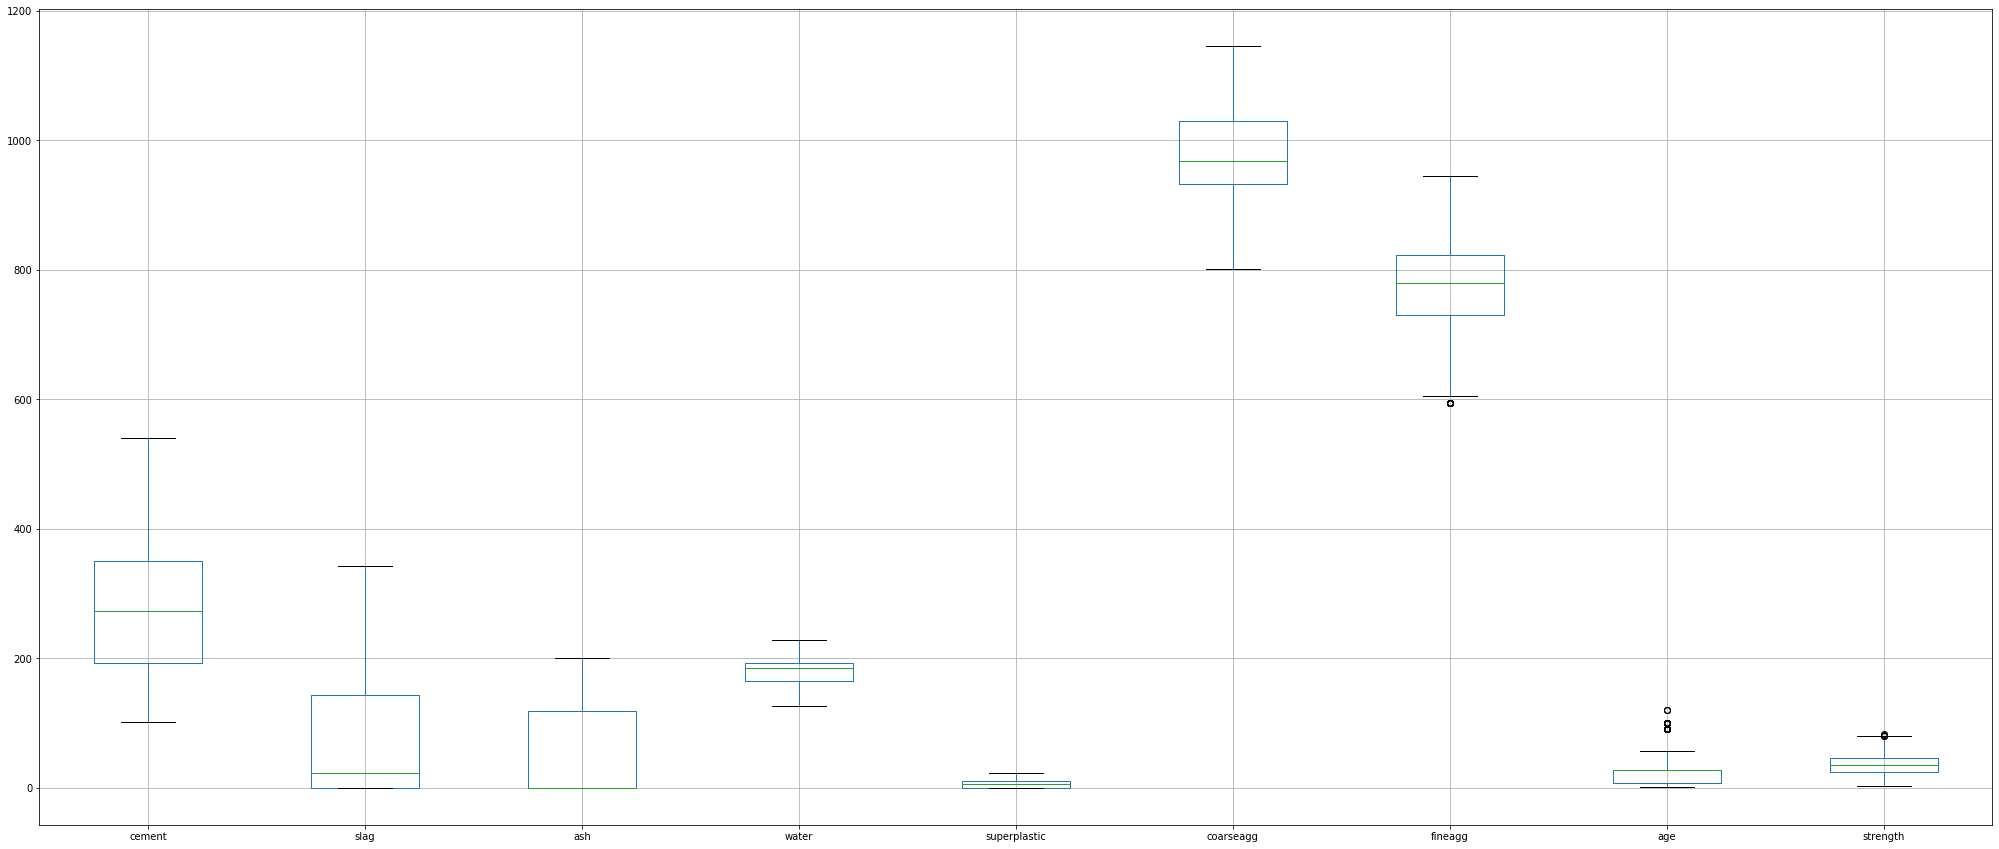

In [44]:
concrete_df1.boxplot(figsize=(35,15))

In [45]:
df1 = concrete_df1.copy()

In [46]:
df1.shape

(1030, 9)

## Feature Engineering

#### Scaling the dataset

In [80]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from scipy.stats import zscore
from sklearn.feature_selection import SelectFromModel


In [69]:
#Scaling the dataset
df_z = df1.apply(zscore)
df_z=pd.DataFrame(df_z,columns=df.columns)

In [70]:
df_z.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,2.477918,-0.858191,-0.847132,-0.954284,-0.634188,0.863160,-1.227295,-0.153159,2.645192
1,2.477918,-0.858191,-0.847132,-0.954284,-0.634188,1.056170,-1.227295,-0.153159,1.561277
2,0.491443,0.811547,-0.847132,2.250549,-1.090890,-0.526514,-2.269697,-0.153159,0.266608
3,0.491443,0.811547,-0.847132,2.250549,-1.090890,-0.526514,-2.269697,-0.153159,0.313515
4,-0.790432,0.693201,-0.847132,0.502458,-1.090890,0.070531,0.673183,-0.153159,0.507753


In [73]:
# Independent and dependent features divided...
X = df_z.iloc[:,0:8]
y = df_z.iloc[:,8]

In [74]:
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,2.477918,-0.858191,-0.847132,-0.954284,-0.634188,0.863160,-1.227295,-0.153159
1,2.477918,-0.858191,-0.847132,-0.954284,-0.634188,1.056170,-1.227295,-0.153159
2,0.491443,0.811547,-0.847132,2.250549,-1.090890,-0.526514,-2.269697,-0.153159
3,0.491443,0.811547,-0.847132,2.250549,-1.090890,-0.526514,-2.269697,-0.153159
4,-0.790432,0.693201,-0.847132,0.502458,-1.090890,0.070531,0.673183,-0.153159


In [75]:
y.head()

0    2.645192
1    1.561277
2    0.266608
3    0.313515
4    0.507753
Name: strength, dtype: float64

### Splitting the data

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3, random_state = 0)

In [78]:
scores = pd.DataFrame({"Model":[],
                       "Cross_vall_score":[], 
                       "Mean_squared_error":[],
                       "R2":[]})

### Linear Regression

In [79]:
lin = LinearRegression()
lin.fit(X_train,y_train)
pred = lin.predict(X_test)
score_bass = round(np.sqrt(mean_squared_error(pred,y_test)),2)
base_r2 = round(r2_score(pred,y_test),2)
Base_cross = round(cross_val_score(lin,X_train,y_train,cv = 5).mean(),2)
scores.loc[0]= ["Multiple Linear Regression", Base_cross, score_bass,base_r2]
print(scores)

                        Model  Cross_vall_score  Mean_squared_error    R2
0  Multiple Linear Regression              0.71                0.52  0.62


### Feature Selection using Lasso Regression...

In [82]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))
feature_sel_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [85]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [86]:
# lets print the number of total and selected features....
sel_feat = X_train.columns[(feature_sel_model.get_support())]

# lets print some stats...
print("Selected Features= ",len(sel_feat))

Selected Features=  8


In [87]:
sel_feat

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

Since every feature got selected using Lasso regression which measures on the overfirt and underfit basis... we can take all features..

### Lasso Regression

In [88]:
las = Lasso(alpha=0.01)
las.fit(X_train,y_train)
predict3 = las.predict(X_test)
cross_vall_lass1 = round(cross_val_score(las,X_train,y_train,cv=5).mean(),2)
score_lass1 = round(np.sqrt(mean_squared_error(predict3,y_test)),2)
r2_score_lass1 = round(r2_score(predict3,y_test),2)

n = scores.shape[0]
scores.loc[n] = ["Lasso_Regression2",cross_vall_lass1,score_lass1,r2_score_lass1]
print(scores)

                        Model  Cross_vall_score  Mean_squared_error    R2
0  Multiple Linear Regression              0.71                0.52  0.62
1           Lasso_Regression2              0.71                0.52  0.60


### Decision Tree

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

from sklearn import metrics

In [93]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [94]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.338280
slag          0.073381
ash           0.031875
water         0.110158
superplastic  0.051598
coarseagg     0.034809
fineagg       0.031380
age           0.328519


In [97]:

y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9925761880830348
Performance on testing data using DT: 0.7594828092969386
Accuracy DT:  0.7594828092969386
MSE:  0.22144482581788655


In [98]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.759483


In [99]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.60814024788859
Standard Deviation:  0.4924302069219871


C:\Users\P V S Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### Drop the least significant variable

In [101]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   float64
 8   strength      1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


In [102]:
#Create a copy of the dataset...
df2=df_z.copy()

In [103]:
#independent and dependent variable
X = df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df2['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

### Decision Tree 2

In [104]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [105]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.349682
slag          0.073326
water         0.140297
superplastic  0.059564
age           0.377131


In [106]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.991979544261888
Performance on testing data using DT: 0.8014610100700359
Accuracy DT:  0.8014610100700359


In [107]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree 2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.759483
3,Decision Tree 2,0.801461


In [108]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [110]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9793987810951607
Performance on testing data using RFR: 0.8749105890476735
Accuracy DT:  0.8749105890476735
MSE:  0.11759625898500407


In [111]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.759483
3,Decision Tree 2,0.801461
7,Random Forest Regressor,0.874911


### KFold Cross_Validation

In [112]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\Users\P V S Karthik\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.7440384159102227
Standard Deviation:  0.18794558646938686


In [114]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.759483
3,Decision Tree 2,0.801461
7,Random Forest Regressor,0.874911
8,Random Forest Regressor k fold,0.744038
8,Random Forest Regressor k fold,0.744038


### Based on the Above Observations the Random Forest Regressor is working well.